In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

# Importing CSV 

In [2]:
df = pd.read_csv('Titan_insurance.csv') # read the data as a data frame

# Checking the top 5 rows

In [3]:
df.head()

,Salesperson,Old Scheme,New Scheme
0,1,57,62
1,2,103,122
2,3,59,54
3,4,75,82
4,5,84,84


# Checking Summary of data

In [4]:
df.describe()

,Salesperson,Old Scheme,New Scheme
count,30.000000,30.000000,30.000000
mean,15.500000,68.033333,72.033333
std,8.803408,20.455980,24.062395
min,1.000000,28.000000,32.000000
25%,8.250000,54.000000,55.000000
50%,15.500000,67.000000,74.000000
75%,22.750000,81.500000,85.750000
max,30.000000,110.000000,122.000000


# Check for missing values

In [5]:
# Check for missing value in any colum
df.isnull().sum()

Salesperson    0
Old Scheme     0
New Scheme     0
dtype: int64

There are no missing values in the dataset.

# Plot Histograms and boxplot

array([[<AxesSubplot:title={'center':'Salesperson'}>,
        <AxesSubplot:title={'center':'Old Scheme'}>],
       [<AxesSubplot:title={'center':'New Scheme'}>, <AxesSubplot:>]],
      dtype=object)

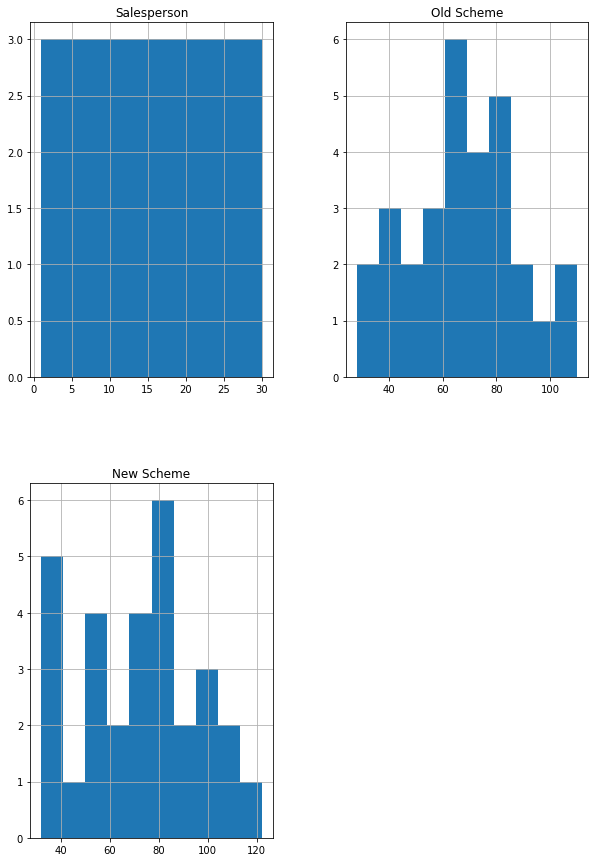

In [6]:
df.hist(figsize=(10,15))

<AxesSubplot:xlabel='New Scheme'>

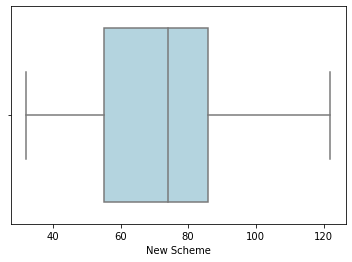

In [7]:
sns.boxplot(x= df['New Scheme'], color='lightblue')

<AxesSubplot:xlabel='Old Scheme'>

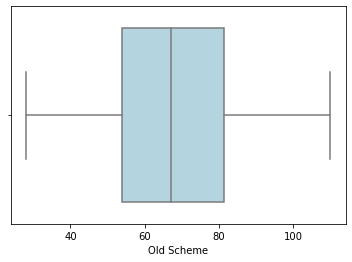

In [8]:
sns.boxplot(x= df['Old Scheme'], color='lightblue')

- Both the samples seems to be normally distributed.
- Mean and Median Values are not much different.

- The Old scheme data looks more normally distributed, whereas the New scheme data looks left skewed. there is a dip in the performance.

# Describe the five per cent significance test you would apply to these data to determine whether new scheme has significantly raised outputs?

- The level of significance (Alpha ) = 0.05.

- The sample size , N = 30 which is sufficiently large for a Zstat Test.

- But since the population standard deviation (Sigma) is unknown, we have to use a Tstat test.

- Degree of Freedom: Since the sample is the same for both Sampling tests, we have N-1 degrees of freedom : 29

- Since the sole purpose of the test is to check whether the New scheme is successful compared to old scheme, we would prefer a Right tailed T Test.

Hypothesis Formulation

Use the T Test: Paired two Sample for Means:

- Ho = New Scheme did not raise the output significantly

- Ha = New Scheme raised the output significantly

In [9]:

t, p_value  = stats.ttest_rel(df['Old Scheme'],df['New Scheme'])  #Performing a paired t-test

print(t, p_value)

-1.5559143823544377 0.13057553961337662


# What conclusion does the test lead to?

In this scenario, the p value is greater than the 0.05. Hence accept the null hypothesis that the new scheme did not raise the output significantly.

# What reservations have you about this result?

- If we compare the means of the two sample distributions, we see that even though visually it seems as if New scheme has fared better, statistically it does not hold.
- The higher mean in the case of New scheme can also be attributed to the higher variance compared to Old Scheme.
- The variance of the second data set, 579.00, is 38% more than the variance of the first data set, 418.45.
- We are unsure of the sampling error present in the data.
- Unpredictable pattern persist even after the bonus scheme direct the management to work on the lift (product portfolio) and to correct the bonus scheme in proportion to revenue generation rather than policy sale.
- The scheme is expensive for the company but they are looking to compensate it by increase in sales. The agreement with the sales force is that if the scheme does not at least break even for the company, it will be abandoned after six months. So, it's better for the management to wait for another two months.
-There is dip in the New Scheme towards end of the cycle, which suggests that the Sales team may have booked all their sales at the earlier part of the period to get their incentives early or may be waiting till the end of quarter (measurement period) to book all their sales at once. Hence aggregation of data for a quarter may provide more clarity on the performance than for a single month.

# Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000. If this figure is alternative hypothesis, what is:

- The probability of a type 1 error?
- The probability of a type 2 error?
- The power of the test?

Type I error (𝜶): Probability of rejecting the null hypothesis when it is true. The probability of a Type I error in hypothesis testing is predetermined by the significance level.

Type II error (𝜷) : Probability of failing to reject null when it is false. Type II error calculation depends on the population mean which is unknown.

If alternate hypothesis 𝜇(New Scheme) – 𝜇(Old Scheme) = 𝜇𝑑 = £5000 is true. What is the type I and II error.

- Null Hypothesis = 𝜇(New Scheme) – 𝜇(Old Scheme) = 𝜇𝑑 = 0
- First we need to calculate the probability of Type I error which is predetermined by significance level. If the significance level is 0.05,
- then type I error is 0.05. i.e. 5% probability we make Type I error – rejecting null hypothesis when it is true.
- Type II error calculation depends on a particular value of 𝜇. In this case lets assume difference of population 𝜇 is £5K. Lets also assume that the significance level for the test is 0.05. Then the calculation is as below :
- This is a right tailed test

In [10]:
from scipy.stats import t
value = abs(t.ppf(0.05, 29))
value

1.6991270265334977

We fail to reject the null hypothesis (commit a type II error) if we get a T-statistic less than 1.699127 for the sample size of 30

To begin with, we need to find the 𝐷̅ until we fail to reject the null hypothesis. Then we need to identify the probability of calculated 𝐷̅ appearing when the 𝜇𝑑 = £5000.

𝑡𝑠𝑡𝑎𝑡=(𝑑̅− 𝜇𝐷)/𝑆𝑑√𝑛

1.699=(d-0)/24/mt.sqrt(30)

In [17]:
d=1.699 * 4.38
d

7.44162

The above calculation states that we will incorrectly fail to reject the null hypothesis as long as we draw samples where the difference of mean is less than £7.44K.

Now given 𝜇old – 𝜇new = 5K, we can compute the probability of drawing the sample mean difference lesser than 7.44K as follows:

In [18]:
tstat=(7.44-5)/4.38
tstat

0.5570776255707763

# Probability of Type II Error

In [0]:
p = t.cdf(-0.245, 29)
p

0.40409092020034065

Hence, Probability of making Type II Error is 40.40%

# Power of the Test:
    
Power of the hypothesis test is 1 minus the probability of Type II error.
Basically the power of a test is the probability that we make the right decision when the null is not correct (i.e. we correctly reject it)

In [0]:
print("Power of test is", 1- p )

Power of test is 0.5959090797996593


# Conclusion

From the given data, it may be concluded that, statistically there is no significant increase in sales because of the new incentive plan. However, our recommendation is that the test be carried out with a larger sample size covering a longer test period (at least a quarter) to improve the accuracy of test result and negating any one-time effect on the sales performance. Also, the results need to be interpreted and future actions be planned with the understanding of overall business performance.